## <b>NN method for prediction

In [43]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder , StandardScaler

from keras import models , layers , optimizers , callbacks , regularizers

### Preprocess

In [21]:
encoder = LabelEncoder()
scaler = StandardScaler()

df = pd.read_csv('./titanic/train.csv')
X = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
# labels and training data
labels = X["Survived"]
X = X.drop(["Survived"] , axis=1)

# fill na
X["Age"] = X["Age"].fillna(X["Age"].median())
X["Fare"] = X["Fare"].fillna(X["Fare"].median())
X["Embarked"] = X["Embarked"].fillna(X["Embarked"].sample(random_state=42).iloc[0])

# encode and scale
X["Sex"] = encoder.fit_transform(X["Sex"])
X["Embarked"] = encoder.fit_transform(X["Embarked"])

X["Age"] = scaler.fit_transform(pd.DataFrame(X["Age"]))
X["Fare"] = scaler.fit_transform(pd.DataFrame(X["Fare"]))


<b>Train test split

In [22]:
X_tr, X_te, y_tr, y_te = train_test_split(X, labels, test_size=0.2, random_state=42)

### Create Model

In [59]:
def ModelCreateAndCompile():
    model = models.Sequential([
        layers.InputLayer((X_tr.shape[1],)),
        layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [60]:
model = ModelCreateAndCompile()
model.summary()

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_tr, y_tr, validation_data=(X_te, y_te), epochs=100, batch_size=64, verbose=1, callbacks=[early_stopping])

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,361 (13.13 KB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5033 - loss: 1.6449 - val_accuracy: 0.5754 - val_loss: 1.4091
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5270 - loss: 1.6079 - val_accuracy: 0.5810 - val_loss: 1.3886
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5876 - loss: 1.5539 - val_accuracy: 0.5810 - val_loss: 1.3699
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5920 - loss: 1.5274 - val_accuracy: 0.5866 - val_loss: 1.3547
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5962 - loss: 1.4719 - val_accuracy: 0.5866 - val_loss: 1.3412
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5895 - loss: 1.4832 - val_accuracy: 0.5866 - val_loss: 1.3288
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6389 - loss: 1.3944 - val_accuracy: 0.5866 - val_loss: 1.3146
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6683 - loss: 1.3661 - val_accuracy: 0.5866

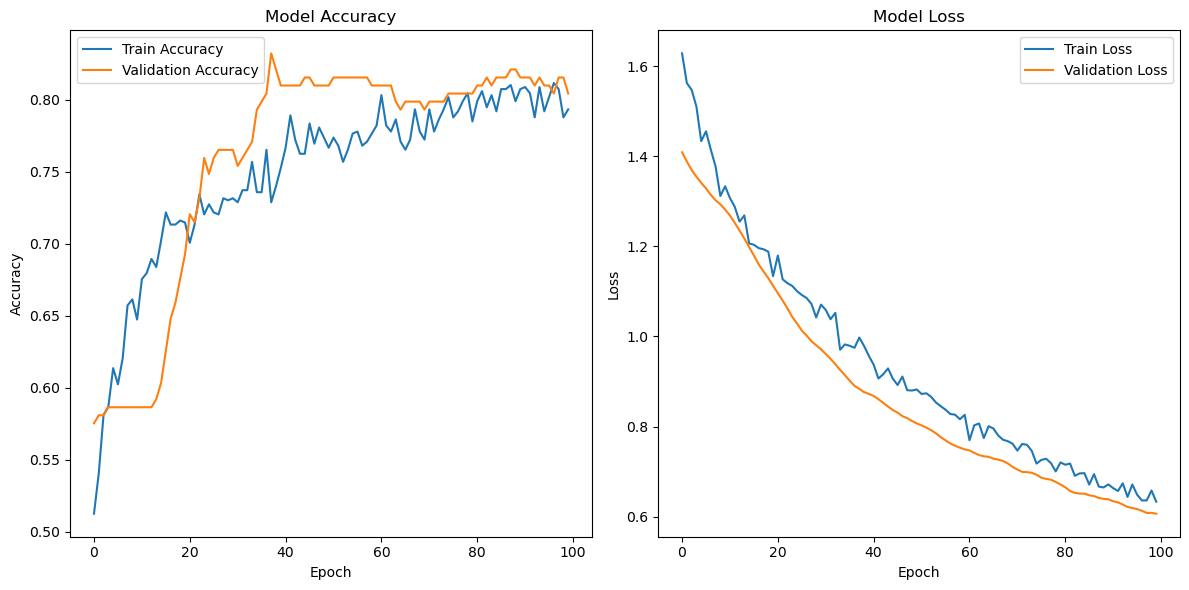

In [61]:
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Accuracy Score: 0.8044692737430168


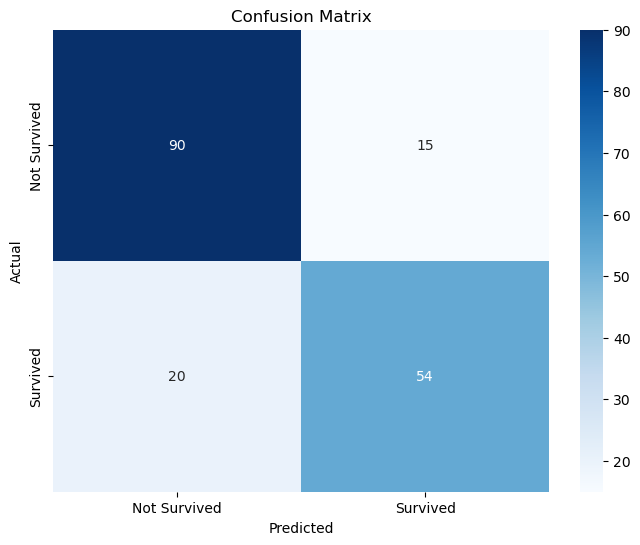

In [62]:
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred = (model.predict(X_te) > 0.5).astype("int32")

accuracy = accuracy_score(y_te, y_pred)
print(f"Accuracy Score: {accuracy}")

# Generate confusion matrix
cm = confusion_matrix(y_te, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [63]:
model.save("Titanic_nn.keras")

### Use model to make predictions

In [64]:
# prepare testing data
df_test = pd.read_csv('./titanic/test.csv')

idx_col = df_test["PassengerId"]
X_test = df_test.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# fill na
X_test["Age"] = X_test["Age"].fillna(X_test["Age"].median())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].median())
X_test["Embarked"] = X_test["Embarked"].fillna(X_test["Embarked"].sample(random_state=42).iloc[0])

# encode and scale
X_test["Sex"] = encoder.fit_transform(X_test["Sex"])
X_test["Embarked"] = encoder.fit_transform(X_test["Embarked"])

X_test["Age"] = scaler.fit_transform(pd.DataFrame(X_test["Age"]))
X_test["Fare"] = scaler.fit_transform(pd.DataFrame(X_test["Fare"]))

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [65]:
pred = model.predict(X_test)
pred = (pred > 0.5).astype("int32")
submission = pd.DataFrame({
    "PassengerId": idx_col,
    "Survived": pred.flatten()
})
submission.to_csv("submission.csv", index=False)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
